In [73]:
import numpy as np
s1 = np.random.randint(-10, 10, 10)
s2 = np.random.randint(-10, 10, 10)
s3 = np.random.randint(-10, 10, 10)
print(s1)
print(s2)
print(s3)

[  4 -10   1  -6  -6  -2   0  -4   4   4]
[ 8  6 -7  7  5 -2 -8  9  0  8]
[-10   7   8  -5   8   0   9   4   7  -7]


In [74]:
print("s1 =", s1)
print("s2 =", s2)
print("s3 =", s3)

s1 = [  4 -10   1  -6  -6  -2   0  -4   4   4]
s2 = [ 8  6 -7  7  5 -2 -8  9  0  8]
s3 = [-10   7   8  -5   8   0   9   4   7  -7]


In [75]:
variance_s1 = np.var(s1)
print("Variance of s1:", variance_s1)
variance_s2 = np.var(s2)
print("Variance of s2:", variance_s2)
variance_s3 = np.var(s3)
print("Variance of s3:", variance_s3)

Variance of s1: 21.85
Variance of s2: 36.84
Variance of s3: 45.290000000000006


In [76]:
cov_s1_s2 = np.mean(s1 * s2) - np.mean(s1) * np.mean(s2)
print("Covariance of s1 and s2:", cov_s1_s2)
cov_s1_s3 = np.mean(s1 * s3) - np.mean(s1) * np.mean(s3)
print("Covariance of s1 and s3:", cov_s1_s3)
cov_s2_s3 = np.mean(s2 * s3) - np.mean(s2) * np.mean(s3)
print("Covariance of s2 and s3:", cov_s2_s3)


Covariance of s1 and s2: -6.799999999999999
Covariance of s1 and s3: -10.45
Covariance of s2 and s3: -23.560000000000002


In [77]:
import numpy as np
import scipy.io.wavfile
from scipy import signal
import matplotlib.pyplot as plt

In [78]:
sample_rate, input_signal = scipy.io.wavfile.read('myname.wav')

In [79]:
print("Sample rate:", sample_rate)

Sample rate: 48000


In [80]:

# high pass filter
def high_pass_filter(signal, cutoff_freq, sr, order=5):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff_freq / nyquist
    b, a = scipy.signal.butter(order, normal_cutoff, btype='high', analog=False)
    return scipy.signal.lfilter(b, a, signal)
# --- Step 3: Create Low Pass Filter ---
def low_pass_filter(signal, cutoff_freq, sr, order=5):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff_freq / nyquist
    b, a = scipy.signal.butter(order, normal_cutoff, btype='low', analog=False)
    return scipy.signal.lfilter(b, a, signal)
    # BEGIN: Filter out noise
def filter_noise(signal, threshold):
        return np.where(np.abs(signal) > threshold, signal, 0)

cutoff_freq = 10000  # Cutoff frequency in Hz

signal_low_pass = low_pass_filter(input_signal, cutoff_freq, sample_rate)

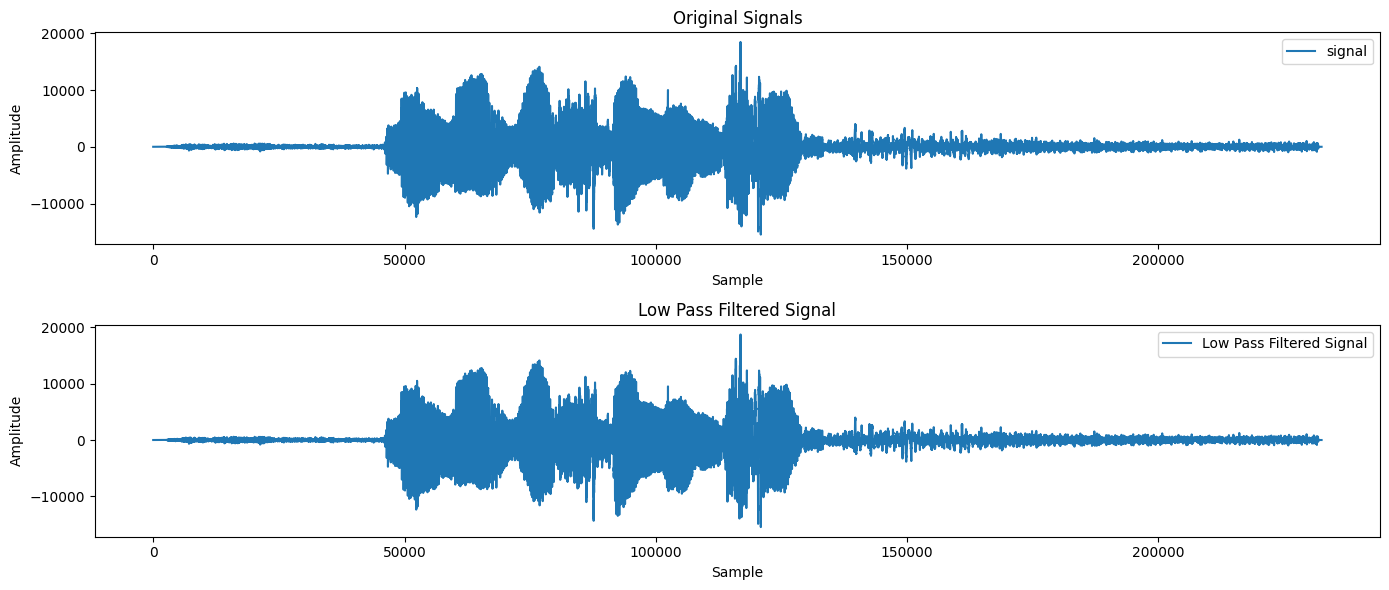

In [81]:
# Plot the original signals
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(input_signal, label='signal')
#plt.plot(mic_1, label='Original mic_1')
plt.title('Original Signals')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(signal_low_pass, label='Low Pass Filtered Signal')
plt.title('Low Pass Filtered Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

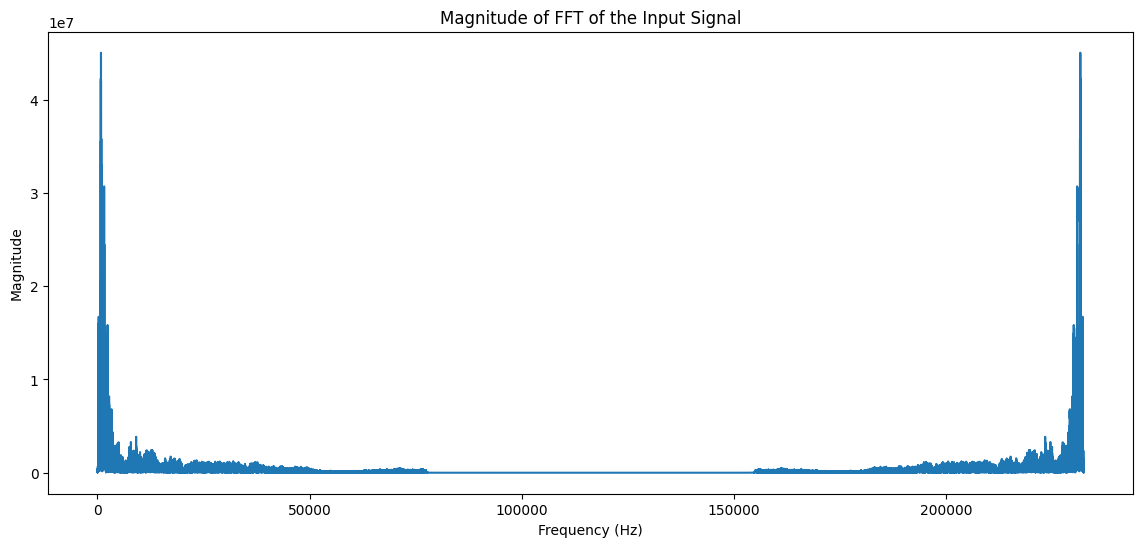

In [82]:
fft_signal = np.fft.fft(input_signal)
plt.figure(figsize=(14, 6))
plt.plot(np.abs(fft_signal))
plt.title('Magnitude of FFT of the Input Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

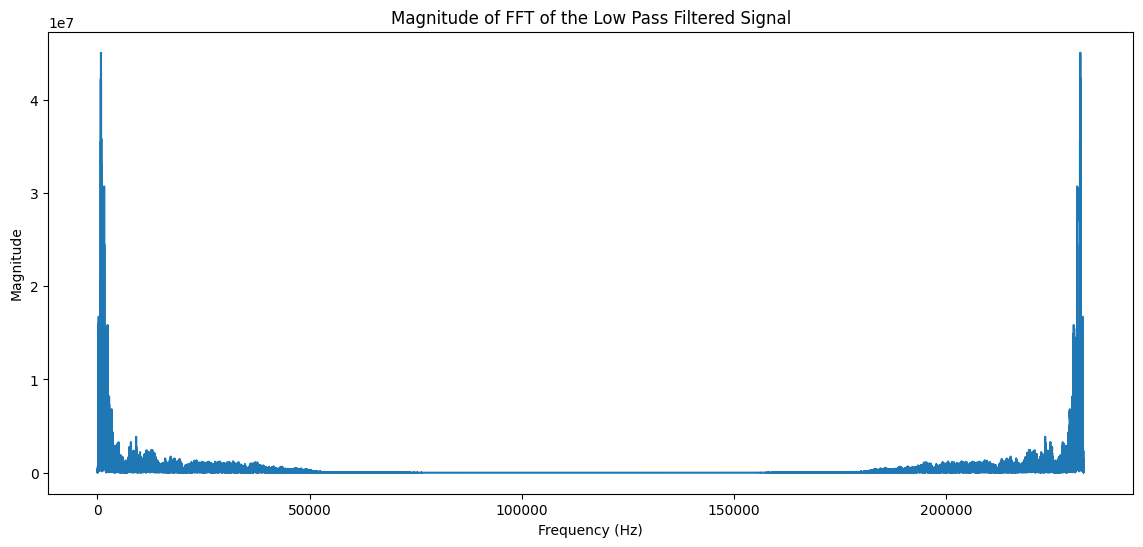

In [83]:
fft_signal_low_pass = np.fft.fft(signal_low_pass)
plt.figure(figsize=(14, 6))
plt.plot(np.abs(fft_signal_low_pass))
plt.title('Magnitude of FFT of the Low Pass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


Audio file 'myname.wav' found with sample rate 48000 Hz.


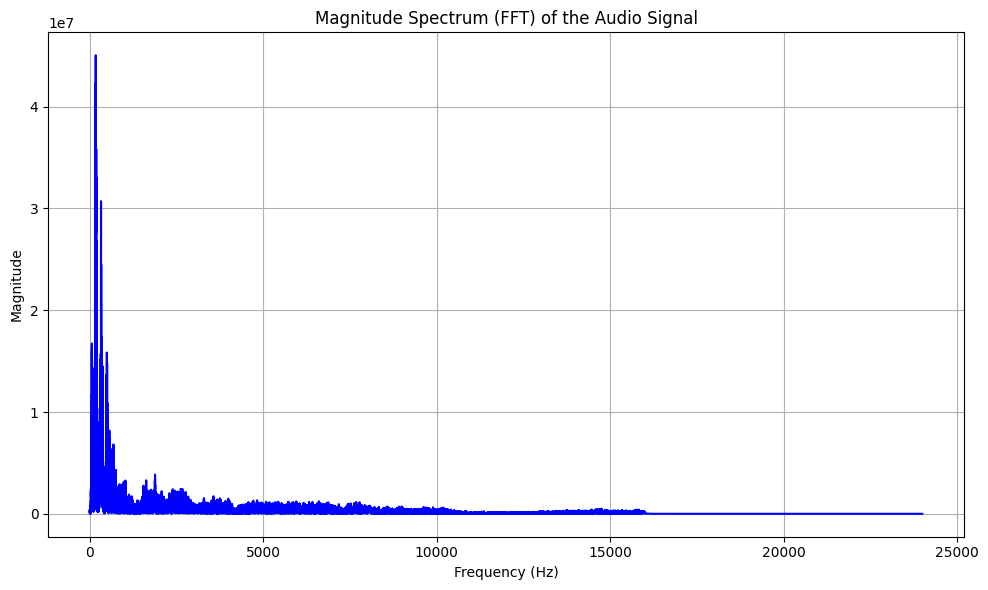

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

filename = 'myname.wav'

# Try to read the audio file; if not found, generate a synthetic signal.
if os.path.exists(filename):
    sample_rate, data = wavfile.read(filename)
    print(f"Audio file '{filename}' found with sample rate {sample_rate} Hz.")
    
    # If stereo, take only the first channel.
    if data.ndim > 1:
        data = data[:, 0]
else:
    print(f"Audio file '{filename}' not found. Generating a synthetic 440 Hz sine wave.")
    sample_rate = 44100  # 44.1 kHz standard sample rate
    duration = 1.0  # seconds
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    frequency = 440  # A4 note frequency in Hz
    data = (0.5 * np.sin(2 * np.pi * frequency * t)).astype(np.float32)

# Compute the FFT of the signal
fft_data = np.fft.fft(data)
N = len(fft_data)
freqs = np.fft.fftfreq(N, d=1/sample_rate)

# Only keep the positive half of the spectrum
half_N = N // 2
positive_freqs = freqs[:half_N]
magnitude = np.abs(fft_data[:half_N])

# Plot the magnitude of the FFT
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, magnitude, color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum (FFT) of the Audio Signal')
plt.grid(True)
plt.tight_layout()
plt.show()
